In [ ]:
import pandas as pd
df_train = pd.read_csv("/kaggle/input/mercedes-stock-data-training/MBG.DE.csv")

In [ ]:
df_train.head()

In [ ]:
df_train = df_train.drop(['Date'], axis=1, errors='ignore')

In [ ]:
df_train.head()

In [ ]:
import os

os.mkdir("/kaggle/working/plots/")
os.mkdir("/kaggle/working/models/")

In [ ]:
import matplotlib.pyplot as plt

dataset_name = "MERCEDEZ BENZE "
plots_dir    = "/kaggle/working/plots"

# Open Price
plt.figure(figsize=(12, 6))
plt.plot(df_train['Open'])
plt.title(dataset_name + "Stock Price {Open}")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.savefig(f"{plots_dir}/open_price.png")
plt.show()

# High Price
plt.figure(figsize=(12, 6))
plt.plot(df_train['High'])
plt.title(dataset_name + "Stock Price {High}")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.savefig(f"{plots_dir}/high_price.png")
plt.show()

# Low Price
plt.figure(figsize=(12, 6))
plt.plot(df_train['Low'])
plt.title(dataset_name + "Stock Price {Low}")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.savefig(f"{plots_dir}/low_price.png")
plt.show()

# Close Price
plt.figure(figsize=(12, 6))
plt.plot(df_train['Close'])
plt.title(dataset_name + "Stock Price {Close}")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.savefig(f"{plots_dir}/close_price.png")
plt.show()

# Adjusted Close
plt.figure(figsize=(12, 6))
plt.plot(df_train['Adj Close'])
plt.title(dataset_name + "Stock Price {Adjusted Close}")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.savefig(f"{plots_dir}/adjusted_close_price.png")
plt.show()


In [ ]:
df_test = pd.read_csv("/kaggle/input/microsoft-stock-data-testing/MSFT.csv")
df_test.head()

In [ ]:
df_test = df_test.drop(['Date'], axis=1, errors='ignore')
df_test.head()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_test['Open'])
plt.title("Microsoft Stock Price {Open}")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_test['High'])
plt.title("Microsoft Stock Price {High}")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_test['Low'])
plt.title("Microsoft Stock Price {Low}")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_test['Close'])
plt.title("Microsoft Stock Price {Close}")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_test['Adj Close'])
plt.title("Microsoft Stock Price {Adjusted Close}")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

In [ ]:
feature_cols = ['High', 'Low', 'Close', 'Adj Close', 'Volume']
target_col  = 'Open'

split_idx = int(len(df_train) * 0.9)

X_train = df_train.iloc[:split_idx][feature_cols]
y_train = df_train.iloc[:split_idx][target_col]

X_val   = df_train.iloc[split_idx:][feature_cols]
y_val   = df_train.iloc[split_idx:][target_col]

print(f"Train shape:     {X_train.shape} → {y_train.shape}")
print(f"Validation shape:{X_val.shape} → {y_val.shape}")

In [ ]:
print("Training part:")
print("Feature cols :-\n")
print(X_train.head())
print()
print("Target col :-\n")
print(y_train.head())

print()

print("Validation Part:")
print("Feature cols :-\n")
print(X_val.head())
print()
print("Target col :-\n")
print(y_val.head())

In [ ]:
df_train[feature_cols].describe()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 1) Create separate scalers
sc_X = MinMaxScaler(feature_range=(0,1))
sc_y = MinMaxScaler(feature_range=(0,1))

# 2) Fit on training data only
X_train_scaled = sc_X.fit_transform(X_train)          # shape: (n_samples, n_features)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1,1))  # shape: (n_samples, 1)

# 3) Transform validation data (no refit)
X_val_scaled = sc_X.transform(X_val)
y_val_scaled = sc_y.transform(y_val.values.reshape(-1,1))


In [ ]:
import pandas as pd

# Flatten the (n,1) arrays to (n,)
y_train_flat = y_train_scaled.ravel()
y_val_flat   = y_val_scaled.ravel()

# Re-create DataFrame/Series with matching indices
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_cols, index=X_train.index)
y_train_scaled_s  = pd.Series(y_train_flat,  name=target_col, index=X_train.index)

X_val_scaled_df   = pd.DataFrame(X_val_scaled,   columns=feature_cols, index=X_val.index)
y_val_scaled_s    = pd.Series(y_val_flat,    name=target_col, index=X_val.index)

# Now .head() works
print("Training part:")
print("Feature cols :-\n")
print(X_train_scaled_df.head())

print("\nTarget col :-\n")
print(y_train_scaled_s.head())

print("\nValidation Part:")
print("Feature cols :-\n")
print(X_val_scaled_df.head())

print("\nTarget col :-\n")
print(y_val_scaled_s.head())


In [ ]:
# Check loaded datasets shape
print(f"Training part Shape [feature columns]: {X_train_scaled_df.shape}")
print(f"Training part Shape [target column]: {y_train_scaled_s.shape}")

print(f"Validation Dataset Shape [feature columns]: {X_val_scaled_df.shape}")
print(f"Validation Dataset Shape [target columns]: {y_val_scaled_s.shape}")

In [ ]:
#extract features
X_train_SCALED = X_train_scaled_df[feature_cols].values
X_val_SCALED = X_val_scaled_df[feature_cols].values

In [ ]:
# If you built y_train_scaled_s as a pandas Series:
y_train_flat = y_train_scaled_s.values  # shape = (n_samples,)
y_val_flat   = y_val_scaled_s.values    # shape = (n_samples,)

In [ ]:
#SHAPES
print("Dataset shapes:")
print(f"  X_train_SCALED: {X_train_SCALED.shape}")
print(f"  y_train_flat:   {y_train_flat.shape}")
print(f"  X_val_SCALED:   {X_val_SCALED.shape}")
print(f"  y_val_flat:     {y_val_flat.shape}")

In [ ]:
import numpy as np

def make_lstm_sequences(X, y, window_size):
    """
    X: numpy array of shape (n_samples, n_features)
    y: numpy array of shape (n_samples,)  or (n_samples,1)
    window_size: how many past timesteps to use
    
    Returns:
      X_seq: (n_samples-window_size, window_size, n_features)
      y_seq: (n_samples-window_size,)
    """
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i : i + window_size])
        y_seq.append(y[i + window_size])
    return np.array(X_seq), np.array(y_seq).reshape(-1,)

# assume you have:
#   X_train_SCALED  (n_train, n_features)
#   X_val_SCALED    (n_val,   n_features)
#   y_train_flat    (n_train,)  # e.g. y_train_scaled_s.values
#   y_val_flat      (n_val,)

WINDOW_SIZE = 60

X_train_seq, y_train_seq = make_lstm_sequences(X_train_SCALED, y_train_flat, WINDOW_SIZE)
X_val_seq,   y_val_seq   = make_lstm_sequences(X_val_SCALED,   y_val_flat,   WINDOW_SIZE)

print("After sequencing:")
print(f"  X_train_seq shape = {X_train_seq.shape}  # → (n_train−{WINDOW_SIZE}, {WINDOW_SIZE}, n_features)")
print(f"  y_train_seq shape = {y_train_seq.shape}")
print(f"  X_val_seq   shape = {X_val_seq.shape}")
print(f"  y_val_seq   shape = {y_val_seq.shape}")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import Input, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks  import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# BUILD LSTM MODEL

In [ ]:
#INITIALIZE MODEL
regressor = Sequential()

#ADD INPUT LAYER
regressor.add(Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2])))

# Add first LSTM layer and dropout regularization layer
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

# Add second LSTM layer and dropout regularization layer
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

# Add third LSTM layer and dropout regularization layer
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

# Add forth LSTM layer and dropout regularization layer
regressor.add(LSTM(units = 100))
regressor.add(Dropout(rate = 0.2))

# Add last dense layer/output layer
regressor.add(Dense(units = 1))

# Compiling the model
# Compiling the model
regressor.compile(optimizer = "adam", loss="mean_squared_error")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# INITIALIZE MODEL
regressor = Sequential()

# ADD INPUT LAYER
regressor.add(Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2])))

# Add first LSTM block with L2, recurrent-dropout, dropout + BatchNorm
regressor.add(LSTM(
    units=100,
    return_sequences=True,
    kernel_regularizer=regularizers.l2(1e-4),
    recurrent_regularizer=regularizers.l2(1e-4),
    recurrent_dropout=0.2,
    dropout=0.2
))
regressor.add(BatchNormalization())

# Add second LSTM block
regressor.add(LSTM(
    units=100,
    return_sequences=True,
    kernel_regularizer=regularizers.l2(1e-4),
    recurrent_regularizer=regularizers.l2(1e-4),
    recurrent_dropout=0.2,
    dropout=0.2
))
regressor.add(BatchNormalization())

# Add third LSTM block
regressor.add(LSTM(
    units=100,
    return_sequences=True,
    kernel_regularizer=regularizers.l2(1e-4),
    recurrent_regularizer=regularizers.l2(1e-4),
    recurrent_dropout=0.2,
    dropout=0.2
))
regressor.add(BatchNormalization())

# Add fourth LSTM block (no return_sequences)
regressor.add(LSTM(
    units=100,
    kernel_regularizer=regularizers.l2(1e-4),
    recurrent_regularizer=regularizers.l2(1e-4),
    recurrent_dropout=0.2,
    dropout=0.2
))
regressor.add(BatchNormalization())

# Add output layer
regressor.add(Dense(units=1))

# Compile the model
regressor.compile(
    optimizer='adam',
    loss='mean_squared_error',
)


# Callbacks

In [ ]:
# Create a checkpoint to monitor the validation loss and save the model with the best performance.
model_location = "/kaggle/working/models/"
model_name = "model_NO_batchNorm_lstm.model.keras"

best_model_checkpoint_callback = ModelCheckpoint(
    model_location + model_name, 
    monitor="val_loss", 
    save_best_only=True, 
    mode="min", 
    verbose=0
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,   # roll back to the best model when stopping
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,      # cut LR in half
    patience=3,      # wait 3 epochs with no improvement
    min_lr=1e-6,     # don't go below this LR
    verbose=1
)

# Markdown

In [ ]:
# Training the model
history = regressor.fit(
    x = X_train_seq, 
    y = y_train_seq,
    validation_data = (X_val_seq, y_val_seq),
    epochs=200,
    batch_size=64,
    callbacks=[best_model_checkpoint_callback]
)


In [ ]:
# Visualizing model performance during training
plt.figure(figsize=(18, 6))

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")

plt.title("LSTM Model Performance")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Load model

In [ ]:
from keras.models import load_model

model_loc = "/kaggle/working/models/"
model_name = "model_NO_batchNorm_lstm.model.keras"
best_model = load_model(model_loc + model_name)

In [ ]:
# 1) Get scaled predictions
y_train_pred_scaled = best_model.predict(X_train_seq)
y_val_pred_scaled   = best_model.predict(X_val_seq)

# 2) Inverse‐scale back to original prices
#    (assumes you used sc_y = MinMaxScaler() on y)
y_train_pred = sc_y.inverse_transform(y_train_pred_scaled.reshape(-1,1)).ravel()
y_train_true = sc_y.inverse_transform(y_train_seq.reshape(-1,1)).ravel()

y_val_pred   = sc_y.inverse_transform(y_val_pred_scaled.reshape(-1,1)).ravel()
y_val_true   = sc_y.inverse_transform(y_val_seq.reshape(-1,1)).ravel()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Train RMSE:", np.sqrt(mean_squared_error(y_train_true, y_train_pred)))
print("Train MAE: ", mean_absolute_error(  y_train_true, y_train_pred))
print("Train R²:  ", r2_score(              y_train_true, y_train_pred))

print("Val   RMSE:", np.sqrt(mean_squared_error(y_val_true,   y_val_pred)))
print("Val   MAE: ", mean_absolute_error(  y_val_true,   y_val_pred))
print("Val   R²:  ", r2_score(              y_val_true,   y_val_pred))

In [ ]:
# Define chart colors
train_actual_color = "cornflowerblue"
validate_actual_color = "orange"
train_predicted_color = "lightblue"
validate_predicted_color = "peru"

plt.figure(figsize=(14, 6))

# Plot Training Set
plt.plot(y_train_true, color=train_actual_color, label="Train Actual")
plt.plot(y_train_pred, color=train_predicted_color, linestyle='--', label="Train Predicted")

# Plot Validation Set
# Offset validation indices to follow training indices for clarity
val_start_index = len(y_train_true)
val_indices = list(range(val_start_index, val_start_index + len(y_val_true)))

plt.plot(val_indices, y_val_true, color=validate_actual_color, label="Val Actual")
plt.plot(val_indices, y_val_pred, color=validate_predicted_color, linestyle='--', label="Val Predicted")

# Formatting
plt.title("Actual vs Predicted Stock Prices", fontsize=16)
plt.xlabel("Time Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12, 5))

# Plot only the validation data
plt.plot(y_val_true, color="orange", label="Val Actual")
plt.plot(y_val_pred, color="peru", linestyle='--', label="Val Predicted")

# Highlight errors with vertical gray lines
for i in range(len(y_val_true)):
    plt.plot([i, i], [y_val_true[i], y_val_pred[i]], color='gray', alpha=0.3)

# Labels and formatting
plt.title("Validation: Actual vs Predicted Stock Prices", fontsize=14)
plt.xlabel("Validation Time Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Testing

In [ ]:
print("MSFT Open Range Before Scaling:", y_test_raw.min().values[0], y_test_raw.max().values[0])
print("MSFT Open Range After Scaling :", y_test_scaled.min(), y_test_scaled.max())

print("Training Open Range:", sc_y.data_min_, sc_y.data_max_)

In [ ]:
import pandas as pd
# Load test CSV
test_df = pd.read_csv('/kaggle/input/some-more-stocks/BTC-USD.csv')
test_df = test_df.drop(['Date'], axis=1, errors='ignore')

# Drop NA if present
test_df.dropna(inplace=True)

In [ ]:
test_df.head()

In [ ]:
feature_cols = ['High', 'Low', 'Close', 'Adj Close', 'Volume']
target_col  = 'Open'

X_test = test_df[feature_cols]
y_test = test_df[target_col]

print(f"Test shape: {X_test.shape} → {y_test.shape}")

print(len(X_test), len(y_test))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# TEMP SCALERS FOR DEBUGGING
sc_X_test = MinMaxScaler(feature_range=(0,1))
sc_y_test = MinMaxScaler(feature_range=(0,1))

X_test_scaled = sc_X_test.fit_transform(X_test)
y_test_scaled = sc_y_test.fit_transform(y_test.values.reshape(-1,1))

In [ ]:
print(len(X_test_scaled), len(y_test_scaled))

In [ ]:
def create_lookback_sequences(X, y, lookback=60):
    X_seq, y_seq = [], []
    for i in range(lookback, len(X)):
        X_seq.append(X[i-lookback:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)


In [ ]:
import numpy as np
lookback = 60
X_test_seq, y_test_seq = create_lookback_sequences(X_test_scaled, y_test_scaled)


In [ ]:
print(len(X_test_seq), len(y_test_seq))

In [ ]:
from keras.models import load_model

# Load your saved model
model = load_model('/kaggle/input/model_no_batchnorm_lstm.model_mbg/keras/default/1/model_NO_batchNorm_lstm.model_MBG.keras')

#predict
y_pred_scaled = model.predict(X_test_seq)

# Inverse using test scaler
y_pred = sc_y_test.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_true = sc_y_test.inverse_transform(y_test_seq.reshape(-1, 1)).ravel()


In [ ]:
print(len(y_pred), len(y_true))

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_true, color='green', label='Actual Open')
plt.plot(y_pred, color='blue', linestyle='--', label='Predicted Open')
plt.title("Testing on MSFT.csv: Actual vs Predicted Open Prices")
plt.xlabel("Time Index")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Test RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("Test MAE: ", mean_absolute_error(y_true, y_pred))
print("Test R²:  ", r2_score(y_true, y_pred))

In [ ]:
print("y_test shape:", y_true.shape)
print("y_pred shape:", y_pred.shape)

y_pred = y_pred.flatten()

results_df = pd.DataFrame({
    'Actual': y_true.flatten(),
    'Predicted': y_pred
})

print(results_df.head(20))

In [ ]:
print("Length y_test:", len(y_test))
print("Length y_pred:", len(y_pred))

In [ ]:
results_df['Error'] = abs(results_df['Actual'] - results_df['Predicted'])
results_df_sorted = results_df.sort_values(by='Error', ascending=True)

# Save entire sorted DataFrame to CSV
results_df_sorted.to_csv('/kaggle/working/results_sorted_by_error_7.csv', index=False)

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow import keras

model = keras.models.load_model('/kaggle/working/model3_lstm.model.keras')
model.summary()

plot_model(model, to_file='/kaggle/working/model_architecture.png', show_shapes=True, show_layer_names=True)


# Training, Testing and Saving models with same architecture but different dataset

# Training with BTC Dataset

In [ ]:
import pandas as pd
df_train = pd.read_csv("/kaggle/input/some-more-stocks/BTC-USD.csv")

In [ ]:
df_train.head()

In [ ]:
df_train = df_train.drop(['Date'], axis=1, errors='ignore')
df_train.head()

In [ ]:
import os

os.mkdir("/kaggle/working/plots/")
os.mkdir("/kaggle/working/models/")

In [ ]:
import os
import matplotlib.pyplot as plt

# 1) Ensure output directory exists (relative path)
plots_dir = "/kaggle/working/plots"
os.makedirs(plots_dir, exist_ok=True)

dataset_name = "BTC USD"
symbol       = dataset_name.replace(" ", "_")

# 2) Columns and titles
plot_specs = [
    ("Open",      "Stock Price (Open)"),
    ("High",      "Stock Price (High)"),
    ("Low",       "Stock Price (Low)"),
    ("Close",     "Stock Price (Close)"),
    ("Adj Close", "Stock Price (Adjusted Close)"),
]

# 3) Loop through specs to save + show
for col, title_suffix in plot_specs:
    plt.figure(figsize=(12, 6))
    plt.plot(df_train[col], label=col)
    plt.title(f"{dataset_name} {title_suffix}")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.grid(True)

    # Build a safe filename, e.g. 'open_BAJAJ_AUTO.png'
    filename = f"{col.replace(' ', '').lower()}_{symbol}.png"
    filepath = os.path.join(plots_dir, filename)

    # Save to disk
    plt.savefig(filepath)

    # Display in notebook
    plt.show()


In [ ]:
COLS = ['High','Low','Close','Adj Close','Volume']
df_train[COLS].describe()

In [ ]:
import numpy as np

df_train['Volume_log'] = np.log1p(df_train['Volume'])
feature_cols = ['High','Low','Close','Adj Close','Volume_log']

In [ ]:
feature_cols = ['High','Low','Close','Adj Close','Volume_log']
target_col  = 'Open'

split_idx = int(len(df_train) * 0.9)

X_train = df_train.iloc[:split_idx][feature_cols]
y_train = df_train.iloc[:split_idx][target_col]

X_val   = df_train.iloc[split_idx:][feature_cols]
y_val   = df_train.iloc[split_idx:][target_col]

print(f"Train shape:     {X_train.shape} → {y_train.shape}")
print(f"Validation shape:{X_val.shape} → {y_val.shape}")

In [ ]:
print("Training part:")
print("Feature cols :-\n")
print(X_train.head())
print()
print("Target col :-\n")
print(y_train.head())

print()

print("Validation Part:")
print("Feature cols :-\n")
print(X_val.head())
print()
print("Target col :-\n")
print(y_val.head())

In [ ]:
from sklearn.preprocessing import RobustScaler

# 1) Create separate scalers
sc_X_rob_train_BTC = RobustScaler()
sc_y_rob_train_BTC = RobustScaler()

# 2) Fit on training data only
X_train_scaled = sc_X_rob_train_BTC.fit_transform(X_train)          # shape: (n_samples, n_features)
y_train_scaled = sc_y_rob_train_BTC.fit_transform(y_train.values.reshape(-1,1))  # shape: (n_samples, 1)

# 3) Transform validation data (no refit)
X_val_scaled = sc_X_rob_train_BTC.transform(X_val)
y_val_scaled = sc_y_rob_train_BTC.transform(y_val.values.reshape(-1,1))


In [ ]:
import pandas as pd

# Flatten the (n,1) arrays to (n,)
y_train_flat = y_train_scaled.ravel()
y_val_flat   = y_val_scaled.ravel()

# Re-create DataFrame/Series with matching indices
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_cols, index=X_train.index)
y_train_scaled_s  = pd.Series(y_train_flat,  name=target_col, index=X_train.index)

X_val_scaled_df   = pd.DataFrame(X_val_scaled,   columns=feature_cols, index=X_val.index)
y_val_scaled_s    = pd.Series(y_val_flat,    name=target_col, index=X_val.index)

# Now .head() works
print("Training part:")
print("Feature cols :-\n")
print(X_train_scaled_df.head())

print("\nTarget col :-\n")
print(y_train_scaled_s.head())

print("\nValidation Part:")
print("Feature cols :-\n")
print(X_val_scaled_df.head())

print("\nTarget col :-\n")
print(y_val_scaled_s.head())


In [ ]:
# Check loaded datasets shape
print(f"Training part Shape [feature columns]: {X_train_scaled_df.shape}")
print(f"Training part Shape [target column]: {y_train_scaled_s.shape}")

print(f"Validation Dataset Shape [feature columns]: {X_val_scaled_df.shape}")
print(f"Validation Dataset Shape [target columns]: {y_val_scaled_s.shape}")

In [ ]:
#extract features
X_train_SCALED = X_train_scaled_df[feature_cols].values
X_val_SCALED = X_val_scaled_df[feature_cols].values

In [ ]:
# If you built y_train_scaled_s as a pandas Series:
y_train_flat = y_train_scaled_s.values  # shape = (n_samples,)
y_val_flat   = y_val_scaled_s.values    # shape = (n_samples,)

In [ ]:
#SHAPES
print("Dataset shapes:")
print(f"  X_train_SCALED: {X_train_SCALED.shape}")
print(f"  y_train_flat:   {y_train_flat.shape}")
print(f"  X_val_SCALED:   {X_val_SCALED.shape}")
print(f"  y_val_flat:     {y_val_flat.shape}")

In [ ]:
import numpy as np

def make_lstm_sequences(X, y, window_size):
    """
    X: numpy array of shape (n_samples, n_features)
    y: numpy array of shape (n_samples,)  or (n_samples,1)
    window_size: how many past timesteps to use
    
    Returns:
      X_seq: (n_samples-window_size, window_size, n_features)
      y_seq: (n_samples-window_size,)
    """
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i : i + window_size])
        y_seq.append(y[i + window_size])
    return np.array(X_seq), np.array(y_seq).reshape(-1,)

# assume you have:
#   X_train_SCALED  (n_train, n_features)
#   X_val_SCALED    (n_val,   n_features)
#   y_train_flat    (n_train,)  # e.g. y_train_scaled_s.values
#   y_val_flat      (n_val,)

WINDOW_SIZE = 60

X_train_seq, y_train_seq = make_lstm_sequences(X_train_SCALED, y_train_flat, WINDOW_SIZE)
X_val_seq,   y_val_seq   = make_lstm_sequences(X_val_SCALED,   y_val_flat,   WINDOW_SIZE)

print("After sequencing:")
print(f"  X_train_seq shape = {X_train_seq.shape}  # → (n_train−{WINDOW_SIZE}, {WINDOW_SIZE}, n_features)")
print(f"  y_train_seq shape = {y_train_seq.shape}")
print(f"  X_val_seq   shape = {X_val_seq.shape}")
print(f"  y_val_seq   shape = {y_val_seq.shape}")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import Input, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks  import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Building model for BTC dataset training

In [ ]:
#INITIALIZE MODEL
regressor_BTC = Sequential()

#ADD INPUT LAYER
regressor_BTC.add(Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2])))

# Add first LSTM layer and dropout regularization layer
regressor_BTC.add(LSTM(units = 100, return_sequences = True))
regressor_BTC.add(Dropout(rate = 0.2))

# Add second LSTM layer and dropout regularization layer
regressor_BTC.add(LSTM(units = 100, return_sequences = True))
regressor_BTC.add(Dropout(rate = 0.2))

# Add third LSTM layer and dropout regularization layer
regressor_BTC.add(LSTM(units = 100, return_sequences = True))
regressor_BTC.add(Dropout(rate = 0.2))

# Add forth LSTM layer and dropout regularization layer
regressor_BTC.add(LSTM(units = 100))
regressor_BTC.add(Dropout(rate = 0.2))

# Add last dense layer/output layer
regressor_BTC.add(Dense(units = 1))

# Compiling the model
regressor_BTC.compile(optimizer = "adam", loss="mean_squared_error")

In [ ]:
from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import (
    Input, Conv1D, GlobalMaxPool1D, RepeatVector,
    LSTM, Dense, Dropout, LayerNormalization
)
from tensorflow.keras import regularizers

regressor_BAJAJ = Sequential([
    # 1) Input (Robust-scaled, zero-centered features)
    Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2])),

    # 2) Local CNN to tame spikes
    Conv1D(
        filters=32,
        kernel_size=3,
        padding='causal',
        activation='tanh',
        kernel_regularizer=regularizers.l2(1e-4)
    ),
    GlobalMaxPool1D(),

    # 3) Restore sequence form
    RepeatVector(X_train_seq.shape[1]),

    # 4) Four stacked LSTM layers
    LSTM(
        64,
        return_sequences=True,
        activation='tanh',
        kernel_regularizer=regularizers.l2(1e-4),
        recurrent_regularizer=regularizers.l2(1e-4),
        recurrent_dropout=0.2,
        dropout=0.2
    ),
    LayerNormalization(),

    LSTM(
        64,
        return_sequences=True,
        activation='tanh',
        kernel_regularizer=regularizers.l2(1e-4),
        recurrent_regularizer=regularizers.l2(1e-4),
        recurrent_dropout=0.2,
        dropout=0.2
    ),
    LayerNormalization(),

    LSTM(
        32,
        return_sequences=True,
        activation='tanh',
        kernel_regularizer=regularizers.l2(1e-4),
        recurrent_regularizer=regularizers.l2(1e-4),
        recurrent_dropout=0.2,
        dropout=0.2
    ),
    LayerNormalization(),

    LSTM(
        16,
        return_sequences=False,
        activation='tanh',
        kernel_regularizer=regularizers.l2(1e-4),
        recurrent_regularizer=regularizers.l2(1e-4),
        recurrent_dropout=0.2,
        dropout=0.2
    ),
    LayerNormalization(),

    # 5) Final MLP head
    Dropout(0.2),
    Dense(16, activation='tanh', kernel_regularizer=regularizers.l2(1e-4)),
    Dense(1, activation='linear')
])

regressor_BAJAJ.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mse']
)


In [ ]:
os.remove("/kaggle/working/models/model_lstm_BAJAJ.model.keras")

In [ ]:
# Create a checkpoint to monitor the validation loss and save the model with the best performance.
model_location = "/kaggle/working/models/"
model_name = "model_lstm_BTC.model.keras"

best_model_checkpoint_callback = ModelCheckpoint(
    model_location + model_name, 
    monitor="val_loss", 
    save_best_only=True, 
    mode="min", 
    verbose=0
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,   # roll back to the best model when stopping
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,      # cut LR in half
    patience=3,      # wait 3 epochs with no improvement
    min_lr=1e-6,     # don't go below this LR
    verbose=1
)

In [ ]:
# Training the model
history_BTC = regressor_BTC.fit(
    x = X_train_seq, 
    y = y_train_seq,
    validation_data = (X_val_seq, y_val_seq),
    epochs=200,
    batch_size=64,
    callbacks=[best_model_checkpoint_callback]
)


In [ ]:
# Visualizing model performance during training
plt.figure(figsize=(18, 6))

plt.plot(history_BTC.history["loss"], label="Training Loss")
plt.plot(history_BTC.history["val_loss"], label="Validation Loss")

plt.title("LSTM Model Performance")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model

model_loc = "/kaggle/working/models/"
model_name = "model_lstm_BTC.model.keras"
best_model = load_model(model_loc + model_name)

In [ ]:
# 1) Get scaled predictions
y_train_pred_scaled = best_model.predict(X_train_seq)
y_val_pred_scaled   = best_model.predict(X_val_seq)

# 2) Inverse‐scale back to original prices
y_train_pred = sc_y_rob_train_BTC.inverse_transform(y_train_pred_scaled.reshape(-1,1)).ravel()
y_train_true = sc_y_rob_train_BTC.inverse_transform(y_train_seq.reshape(-1,1)).ravel()

y_val_pred   = sc_y_rob_train_BTC.inverse_transform(y_val_pred_scaled.reshape(-1,1)).ravel()
y_val_true   = sc_y_rob_train_BTC.inverse_transform(y_val_seq.reshape(-1,1)).ravel()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Train RMSE:", np.sqrt(mean_squared_error(y_train_true, y_train_pred)))
print("Train MAE: ", mean_absolute_error(  y_train_true, y_train_pred))
print("Train R²:  ", r2_score(              y_train_true, y_train_pred))

print("Val   RMSE:", np.sqrt(mean_squared_error(y_val_true,   y_val_pred)))
print("Val   MAE: ", mean_absolute_error(  y_val_true,   y_val_pred))
print("Val   R²:  ", r2_score(              y_val_true,   y_val_pred))

In [ ]:
# Define chart colors
train_actual_color = "cornflowerblue"
validate_actual_color = "orange"
train_predicted_color = "lightblue"
validate_predicted_color = "peru"

plt.figure(figsize=(14, 6))

# Plot Training Set
plt.plot(y_train_true, color=train_actual_color, label="Train Actual")
plt.plot(y_train_pred, color=train_predicted_color, linestyle='--', label="Train Predicted")

# Plot Validation Set
# Offset validation indices to follow training indices for clarity
val_start_index = len(y_train_true)
val_indices = list(range(val_start_index, val_start_index + len(y_val_true)))

plt.plot(val_indices, y_val_true, color=validate_actual_color, label="Val Actual")
plt.plot(val_indices, y_val_pred, color=validate_predicted_color, linestyle='--', label="Val Predicted")

# Formatting
plt.title("Actual vs Predicted Stock Prices", fontsize=16)
plt.xlabel("Time Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12, 5))

# Plot only the validation data
plt.plot(y_val_true, color="orange", label="Val Actual")
plt.plot(y_val_pred, color="peru", linestyle='--', label="Val Predicted")

# Highlight errors with vertical gray lines
for i in range(len(y_val_true)):
    plt.plot([i, i], [y_val_true[i], y_val_pred[i]], color='gray', alpha=0.3)

# Labels and formatting
plt.title("Validation: Actual vs Predicted Stock Prices", fontsize=14)
plt.xlabel("Validation Time Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# TESTING MODEL TRAINED WITH BTC DATASET

In [ ]:
# Load test CSV
test_df = pd.read_csv('/kaggle/input/microsoft-stock-data-testing/MSFT.csv')
test_df = test_df.drop(['Date'], axis=1, errors='ignore')

# Drop NA if present
test_df.dropna(inplace=True)

In [ ]:
test_df.head()

In [ ]:
test_df['Volume_log'] = np.log1p(df_train['Volume'])

In [ ]:
feature_cols = ['High', 'Low', 'Close', 'Adj Close', 'Volume']
target_col  = 'Open'

X_test = test_df[feature_cols]
y_test = test_df[target_col]

print(f"Test shape: {X_test.shape} → {y_test.shape}")

print(len(X_test), len(y_test))

In [ ]:
test_df[feature_cols].describe()

In [ ]:
from sklearn.preprocessing import RobustScaler as RS

# TEMP SCALERS FOR DEBUGGING
sc_X_test_rob_BTC = RS()
sc_y_test_rob_BTC = RS()

X_test_scaled = sc_X_test_rob_BTC.fit_transform(X_test)
y_test_scaled = sc_y_test_rob_BTC.fit_transform(y_test.values.reshape(-1,1))

print(len(X_test_scaled), len(y_test_scaled))

In [ ]:
def create_lookback_sequences(X, y, lookback=60):
    X_seq, y_seq = [], []
    for i in range(lookback, len(X)):
        X_seq.append(X[i-lookback:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)


lookback = 60
X_test_seq, y_test_seq = create_lookback_sequences(X_test_scaled, y_test_scaled)

In [ ]:
print(len(X_test_seq), len(y_test_seq))

In [ ]:
from keras.models import load_model

# Load your saved model
model = load_model('/kaggle/working/models/model_lstm_BTC.model.keras')

#predict
y_pred_scaled = model.predict(X_test_seq)

# Inverse using test scaler
y_pred = sc_y_test_rob_BTC.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_true = sc_y_test_rob_BTC.inverse_transform(y_test_seq.reshape(-1, 1)).ravel()


In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(y_true, color='green', label='Actual Open')
plt.plot(y_pred, color='blue', linestyle='--', label='Predicted Open')
plt.title("Testing on MSFT.csv: Actual vs Predicted Open Prices")
plt.xlabel("Time Index")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("Test RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("Test MAE: ", mean_absolute_error(y_true, y_pred))
print("Test R²:  ", r2_score(y_true, y_pred))

In [ ]:
print("y_test shape:", y_true.shape)
print("y_pred shape:", y_pred.shape)

y_pred = y_pred.flatten()

results_df = pd.DataFrame({
    'Actual': y_true.flatten(),
    'Predicted': y_pred
})

print(results_df.head(20))

In [ ]:
results_df['Error'] = abs(results_df['Actual'] - results_df['Predicted'])
results_df_sorted = results_df.sort_values(by='Error', ascending=True)

# Save entire sorted DataFrame to CSV
results_df_sorted.to_csv('/kaggle/working/results_sorted_by_error_modelBTC_6.csv', index=False)

# Training with BAJAJ dataset

In [ ]:
import pandas as pd

df_train = pd.read_csv("/kaggle/input/some-more-stocks/BAJAJ-AUTO.csv")

In [ ]:
df_train.head()

In [ ]:
df_train = df_train.drop(['Date'], axis = 1, errors = 'ignore')
df_train.head()

In [ ]:
import os

os.mkdir("/kaggle/working/plots/")
os.mkdir("/kaggle/working/models/")

In [ ]:
import os
import matplotlib.pyplot as plt

# 1) Ensure output directory exists (relative path)
plots_dir = "/kaggle/working/plots"
os.makedirs(plots_dir, exist_ok=True)

dataset_name = "BAJAJ AUTO"
symbol       = dataset_name.replace(" ", "_")

# 2) Columns and titles
plot_specs = [
    ("Open",      "Stock Price (Open)"),
    ("High",      "Stock Price (High)"),
    ("Low",       "Stock Price (Low)"),
    ("Close",     "Stock Price (Close)"),
    ("Adj Close", "Stock Price (Adjusted Close)"),
]

# 3) Loop through specs to save + show
for col, title_suffix in plot_specs:
    plt.figure(figsize=(12, 6))
    plt.plot(df_train[col], label=col)
    plt.title(f"{dataset_name} {title_suffix}")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.grid(True)

    # Build a safe filename, e.g. 'open_BAJAJ_AUTO.png'
    filename = f"{col.replace(' ', '').lower()}_{symbol}.png"
    filepath = os.path.join(plots_dir, filename)

    # Save to disk
    plt.savefig(filepath)

    # Display in notebook
    plt.show()


In [ ]:
COLS = ['High','Low','Close','Adj Close','Volume']
df_train[COLS].describe()

In [ ]:
import numpy as np
df_train['Volume_log'] = np.log1p(df_train['Volume'])

In [ ]:
feature_cols = ['High','Low','Close','Adj Close','Volume_log']
target_col  = 'Open'

split_idx = int(len(df_train) * 0.9)

X_train = df_train.iloc[:split_idx][feature_cols]
y_train = df_train.iloc[:split_idx][target_col]

X_val   = df_train.iloc[split_idx:][feature_cols]
y_val   = df_train.iloc[split_idx:][target_col]

print(f"Train shape:     {X_train.shape} → {y_train.shape}")
print(f"Validation shape:{X_val.shape} → {y_val.shape}")

In [ ]:
print("Training part:")
print("Feature cols :-\n")
print(X_train.head())
print()
print("Target col :-\n")
print(y_train.head())

print()

print("Validation Part:")
print("Feature cols :-\n")
print(X_val.head())
print()
print("Target col :-\n")
print(y_val.head())

In [ ]:
from sklearn.preprocessing import RobustScaler

# 1) Create separate scalers
sc_X_rob_train_BAJAJ = RobustScaler()
sc_y_rob_train_BAJAJ = RobustScaler()

# 2) Fit on training data only
X_train_scaled = sc_X_rob_train_BAJAJ.fit_transform(X_train)          # shape: (n_samples, n_features)
y_train_scaled = sc_y_rob_train_BAJAJ.fit_transform(y_train.values.reshape(-1,1))  # shape: (n_samples, 1)

# 3) Transform validation data (no refit)
X_val_scaled = sc_X_rob_train_BAJAJ.transform(X_val)
y_val_scaled = sc_y_rob_train_BAJAJ.transform(y_val.values.reshape(-1,1))


In [ ]:
import pandas as pd

# Flatten the (n,1) arrays to (n,)
y_train_flat = y_train_scaled.ravel()
y_val_flat   = y_val_scaled.ravel()

# Re-create DataFrame/Series with matching indices
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_cols, index=X_train.index)
y_train_scaled_s  = pd.Series(y_train_flat,  name=target_col, index=X_train.index)

X_val_scaled_df   = pd.DataFrame(X_val_scaled,   columns=feature_cols, index=X_val.index)
y_val_scaled_s    = pd.Series(y_val_flat,    name=target_col, index=X_val.index)

# Now .head() works
print("Training part:")
print("Feature cols :-\n")
print(X_train_scaled_df.head())

print("\nTarget col :-\n")
print(y_train_scaled_s.head())

print("\nValidation Part:")
print("Feature cols :-\n")
print(X_val_scaled_df.head())

print("\nTarget col :-\n")
print(y_val_scaled_s.head())


In [ ]:
# Check loaded datasets shape
print(f"Training part Shape [feature columns]: {X_train_scaled_df.shape}")
print(f"Training part Shape [target column]: {y_train_scaled_s.shape}")

print(f"Validation Part Shape [feature columns]: {X_val_scaled_df.shape}")
print(f"Validation Part Shape [target column]: {y_val_scaled_s.shape}")

In [ ]:
#extract features
X_train_SCALED = X_train_scaled_df[feature_cols].values
X_val_SCALED = X_val_scaled_df[feature_cols].values

In [ ]:
# If you built y_train_scaled_s as a pandas Series:
y_train_flat = y_train_scaled_s.values  # shape = (n_samples,)
y_val_flat   = y_val_scaled_s.values    # shape = (n_samples,)

In [ ]:
#SHAPES
print("Dataset shapes:")
print(f"  X_train_SCALED: {X_train_SCALED.shape}")
print(f"  y_train_flat:   {y_train_flat.shape}")
print(f"  X_val_SCALED:   {X_val_SCALED.shape}")
print(f"  y_val_flat:     {y_val_flat.shape}")

In [ ]:
import numpy as np

def make_lstm_sequences(X, y, window_size):
    """
    X: numpy array of shape (n_samples, n_features)
    y: numpy array of shape (n_samples,)  or (n_samples,1)
    window_size: how many past timesteps to use
    
    Returns:
      X_seq: (n_samples-window_size, window_size, n_features)
      y_seq: (n_samples-window_size,)
    """
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i : i + window_size])
        y_seq.append(y[i + window_size])
    return np.array(X_seq), np.array(y_seq).reshape(-1,)

# assume you have:
#   X_train_SCALED  (n_train, n_features)
#   X_val_SCALED    (n_val,   n_features)
#   y_train_flat    (n_train,)  # e.g. y_train_scaled_s.values
#   y_val_flat      (n_val,)

WINDOW_SIZE = 60

X_train_seq, y_train_seq = make_lstm_sequences(X_train_SCALED, y_train_flat, WINDOW_SIZE)
X_val_seq,   y_val_seq   = make_lstm_sequences(X_val_SCALED,   y_val_flat,   WINDOW_SIZE)

print("After sequencing:")
print(f"  X_train_seq shape = {X_train_seq.shape}  # → (n_train−{WINDOW_SIZE}, {WINDOW_SIZE}, n_features)")
print(f"  y_train_seq shape = {y_train_seq.shape}")
print(f"  X_val_seq   shape = {X_val_seq.shape}")
print(f"  y_val_seq   shape = {y_val_seq.shape}")


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import Input, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks  import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

2025-05-31 16:51:16.284085: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748710276.532990      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748710276.605680      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Building model for BAJAJ dataset training

In [ ]:
#INITIALIZE MODEL
regressor_BAJAJ = Sequential()

#ADD INPUT LAYER
regressor_BAJAJ.add(Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2])))

# Add first LSTM layer and dropout regularization layer
regressor_BAJAJ.add(LSTM(units = 100, return_sequences = True))
regressor_BAJAJ.add(Dropout(rate = 0.7))

# Add second LSTM layer and dropout regularization layer
regressor_BAJAJ.add(LSTM(units = 100, return_sequences = True))
regressor_BAJAJ.add(Dropout(rate = 0.7))

# Add third LSTM layer and dropout regularization layer
regressor_BAJAJ.add(LSTM(units = 100, return_sequences = True))
regressor_BAJAJ.add(Dropout(rate = 0.7))

# Add fourth LSTM layer and dropout regularization layer
regressor_BAJAJ.add(LSTM(units = 100, return_sequences = True))
regressor_BAJAJ.add(Dropout(rate = 0.7))

# Add fifth LSTM layer and dropout regularization layer
regressor_BAJAJ.add(LSTM(units = 100, return_sequences = True))
regressor_BAJAJ.add(Dropout(rate = 0.7))

# Add sixth LSTM layer and dropout regularization layer
regressor_BAJAJ.add(LSTM(units = 100, return_sequences = True))
regressor_BAJAJ.add(Dropout(rate = 0.7))

# Add seventh LSTM layer and dropout regularization layer
regressor_BAJAJ.add(LSTM(units = 100, return_sequences = True))
regressor_BAJAJ.add(Dropout(rate = 0.7))

# Add 8th LSTM layer and dropout regularization layer
regressor_BAJAJ.add(LSTM(units = 100))
regressor_BAJAJ.add(Dropout(rate = 0.7))

# Add last dense layer/output layer
regressor_BAJAJ.add(Dense(units = 1))

# Compiling the model
regressor_BAJAJ.compile(optimizer = "adam", loss="mean_squared_error")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# ROBUST LSTM MODEL WITH OVERFITTING PREVENTION
def create_robust_lstm_model(input_shape, 
                           lstm_units=[64, 32, 16], 
                           dropout_rates=[0.20, 0.30, 0.40],
                           l1_reg=0.001, 
                           l2_reg=0.001):
    """
    Creates a robust LSTM model with multiple overfitting prevention techniques
    
    Args:
        input_shape: Shape of input data (timesteps, features)
        lstm_units: List of units for each LSTM layer
        dropout_rates: List of dropout rates for each layer
        l1_reg: L1 regularization strength
        l2_reg: L2 regularization strength
    """
    
    model = Sequential()
    
    # INPUT LAYER
    model.add(Input(shape=input_shape))
    
    # FIRST LSTM LAYER with regularization
    model.add(LSTM(units=lstm_units[0], 
                   return_sequences=True,
                   kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg),
                   recurrent_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rates[0]))
    
    # SECOND LSTM LAYER with regularization
    model.add(LSTM(units=lstm_units[1], 
                   return_sequences=True,
                   kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg),
                   recurrent_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rates[1]))
    
    # THIRD LSTM LAYER (final LSTM layer)
    model.add(LSTM(units=lstm_units[2],
                   kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg),
                   recurrent_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rates[2]))
    
    # OUTPUT LAYER
    model.add(Dense(units=1, kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
    
    return model

# CREATE THE ROBUST MODEL
regressor_BAJAJ = create_robust_lstm_model(
    input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
    lstm_units=[64, 32, 16],  # Decreasing units for feature extraction
    dropout_rates=[0.20, 0.30, 0.40]  # Increasing dropout rates
)

# COMPILE WITH APPROPRIATE OPTIMIZER AND LEARNING RATE
regressor_BAJAJ.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0),
    loss='huber',  # More robust to outliers than MSE
    metrics=['mae', 'mse']
)

In [ ]:
os.rename("/kaggle/working/models/model_lstm_BAJAJ_16.model.keras", "/kaggle/working/models/model_lstm_BAJAJ_16_BEST2.model.keras")

In [ ]:
# Create a checkpoint to monitor the validation loss and save the model with the best performance.
model_location = "/kaggle/working/models/"
model_name = "model_lstm_BAJAJ_16.model.keras"

best_model_checkpoint_callback = ModelCheckpoint(
    model_location + model_name, 
    monitor="val_loss", 
    save_best_only=True, 
    mode="min", 
    verbose=0
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=31,
    restore_best_weights=True,   # roll back to the best model when stopping
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.70,      # cut LR 
    patience=3,      # wait 3 epochs with no improvement
    min_lr=1e-16,     # don't go below this LR
    verbose=1
)

In [ ]:
os.remove("/kaggle/working/models/model_lstm_BAJAJ_15.model.keras")

In [ ]:
# Training the model
history_BAJAJ = regressor_BAJAJ.fit(
    x = X_train_seq, 
    y = y_train_seq,
    validation_data = (X_val_seq, y_val_seq),
    epochs=200,
    batch_size=64,
    callbacks=[best_model_checkpoint_callback, reduce_lr, early_stop]
)


In [ ]:
# Visualizing model performance during training
plt.figure(figsize=(18, 6))

plt.plot(history_BAJAJ.history["loss"], label="Training Loss")
plt.plot(history_BAJAJ.history["val_loss"], label="Validation Loss")

plt.title("LSTM Model Performance")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model

model_loc = "/kaggle/working/models/"
model_name = "model_lstm_BAJAJ_16.model.keras"
best_model = load_model(model_loc + model_name)

In [ ]:
# 1) Get scaled predictions
y_train_pred_scaled = best_model.predict(X_train_seq)
y_val_pred_scaled   = best_model.predict(X_val_seq)

# 2) Inverse‐scale back to original prices
y_train_pred = sc_y_rob_train_BAJAJ.inverse_transform(y_train_pred_scaled.reshape(-1,1)).ravel()
y_train_true = sc_y_rob_train_BAJAJ.inverse_transform(y_train_seq.reshape(-1,1)).ravel()

y_val_pred   = sc_y_rob_train_BAJAJ.inverse_transform(y_val_pred_scaled.reshape(-1,1)).ravel()
y_val_true   = sc_y_rob_train_BAJAJ.inverse_transform(y_val_seq.reshape(-1,1)).ravel()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Train RMSE:", np.sqrt(mean_squared_error(y_train_true, y_train_pred)))
print("Train MAE: ", mean_absolute_error(  y_train_true, y_train_pred))
print("Train R²:  ", r2_score(              y_train_true, y_train_pred))

print("Val   RMSE:", np.sqrt(mean_squared_error(y_val_true,   y_val_pred)))
print("Val   MAE: ", mean_absolute_error(  y_val_true,   y_val_pred))
print("Val   R²:  ", r2_score(              y_val_true,   y_val_pred))

In [ ]:
# Define chart colors
train_actual_color = "cornflowerblue"
validate_actual_color = "orange"
train_predicted_color = "lightblue"
validate_predicted_color = "peru"

plt.figure(figsize=(14, 6))

# Plot Training Set
plt.plot(y_train_true, color=train_actual_color, label="Train Actual")
plt.plot(y_train_pred, color=train_predicted_color, linestyle='--', label="Train Predicted")

# Plot Validation Set
# Offset validation indices to follow training indices for clarity
val_start_index = len(y_train_true)
val_indices = list(range(val_start_index, val_start_index + len(y_val_true)))

plt.plot(val_indices, y_val_true, color=validate_actual_color, label="Val Actual")
plt.plot(val_indices, y_val_pred, color=validate_predicted_color, linestyle='--', label="Val Predicted")

# Formatting
plt.title("Actual vs Predicted Stock Prices", fontsize=16)
plt.xlabel("Time Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12, 5))

# Plot only the validation data
plt.plot(y_val_true, color="orange", label="Val Actual")
plt.plot(y_val_pred, color="peru", linestyle='--', label="Val Predicted")

# Highlight errors with vertical gray lines
for i in range(len(y_val_true)):
    plt.plot([i, i], [y_val_true[i], y_val_pred[i]], color='gray', alpha=0.3)

# Labels and formatting
plt.title("Validation: Actual vs Predicted Stock Prices", fontsize=14)
plt.xlabel("Validation Time Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Testing Bajaj model

In [20]:
# Load test CSV
test_df = pd.read_csv('/kaggle/input/microsoft-stock-data-testing/MSFT.csv')
test_df = test_df.drop(['Date'], axis=1, errors='ignore')

# Drop NA if present
test_df.dropna(inplace=True)
test_df.head()

,Open,High,Low,Close,Adj Close,Volume
0,125.260002,125.760002,124.779999,125.730003,119.908165,16829600
1,124.230003,124.620003,123.320000,123.680000,117.953087,26646800
2,123.849998,124.370003,119.010002,119.839996,114.290863,37983600
3,121.279999,123.279999,120.650002,123.160004,117.457176,29382600
4,124.949997,125.870003,124.209999,125.830002,120.003525,24926100


In [21]:
test_df['Volume_log'] = np.log1p(test_df['Volume'])

In [22]:
feature_cols = ['High', 'Low', 'Close', 'Adj Close', 'Volume_log']
target_col  = 'Open'

X_test = test_df[feature_cols]
y_test = test_df[target_col]

print(f"Test shape: {X_test.shape} → {y_test.shape}")

print(len(X_test), len(y_test))
test_df[feature_cols].describe()

Test shape: (1259, 5) → (1259,)
1259 1259


,High,Low,Close,Adj Close,Volume_log
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,262.739079,257.416290,260.200683,255.273786,17.110587
std,77.478132,76.508350,77.035588,78.424091,0.363685
min,123.279999,119.010002,119.839996,114.290863,16.011535
25%,211.260002,206.709999,208.839996,201.818573,16.868400
50%,259.559998,253.300003,255.910004,251.399506,17.067198
75%,315.130005,309.699996,313.425003,307.956070,17.316915
max,433.600006,427.160004,430.519989,430.519989,18.390352


In [23]:
from sklearn.preprocessing import RobustScaler as RS

# TEMP SCALERS FOR DEBUGGING
sc_X_test_rob_Bajaj = RS()
sc_y_test_rob_Bajaj = RS()

X_test_scaled = sc_X_test_rob_Bajaj.fit_transform(X_test)
y_test_scaled = sc_y_test_rob_Bajaj.fit_transform(y_test.values.reshape(-1,1))

print(len(X_test_scaled), len(y_test_scaled))

1259 1259


In [24]:
def create_lookback_sequences(X, y, lookback=60):
    X_seq, y_seq = [], []
    for i in range(lookback, len(X)):
        X_seq.append(X[i-lookback:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)


lookback = 60
X_test_seq, y_test_seq = create_lookback_sequences(X_test_scaled, y_test_scaled)
print(len(X_test_seq), len(y_test_seq))

1199 1199


In [25]:
from keras.models import load_model

# Load your saved model
model = load_model('/kaggle/input/model_bajaj/keras/default/1/model_lstm_BAJAJ_14_BEST1.model.keras')

#predict
y_pred_scaled = model.predict(X_test_seq)

# Inverse using test scaler
y_pred = sc_y_test_rob_Bajaj.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_true = sc_y_test_rob_Bajaj.inverse_transform(y_test_seq.reshape(-1, 1)).ravel()


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


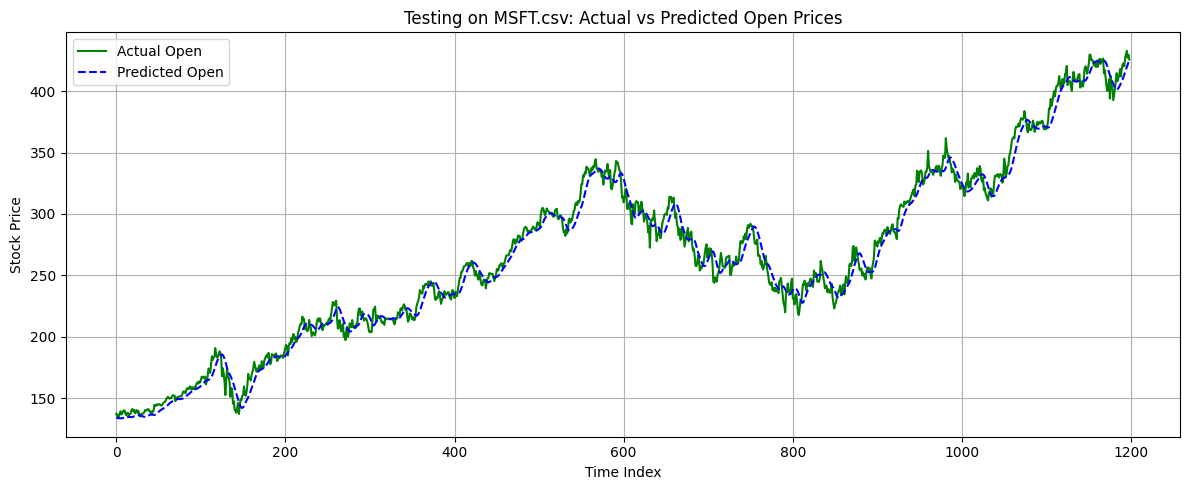

In [26]:
plt.figure(figsize=(12, 5))
plt.plot(y_true, color='green', label='Actual Open')
plt.plot(y_pred, color='blue', linestyle='--', label='Predicted Open')
plt.title("Testing on MSFT.csv: Actual vs Predicted Open Prices")
plt.xlabel("Time Index")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 

print("Test RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("Test MAE: ", mean_absolute_error(y_true, y_pred))
print("Test R²:  ", r2_score(y_true, y_pred))

Test RMSE: 8.147245357577395
Test MAE:  6.5372529251736475
Test R²:   0.9877249156167263


In [ ]:
print("y_test shape:", y_true.shape)
print("y_pred shape:", y_pred.shape)

y_pred = y_pred.flatten()

results_df = pd.DataFrame({
    'Actual': y_true.flatten(),
    'Predicted': y_pred
})

print(results_df.head(20))

In [ ]:
results_df['Error'] = abs(results_df['Actual'] - results_df['Predicted'])
results_df_sorted = results_df.sort_values(by='Error', ascending=True)

# Save entire sorted DataFrame to CSV
results_df_sorted.to_csv('/kaggle/working/results_sorted_by_error_modelBajaj_8_modelNo14.csv', index=False)

# Training model with Apple dataset

In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import RobustScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from keras.models import load_model

In [31]:
df_appl_train = pd.read_csv("/kaggle/input/other-datasets/MYDATA/train/AAPL.csv")
print(df_appl_train.head())
df_appl_train.describe()

         Date       Open       High        Low      Close  Adj Close  \
0  2014-06-13  23.049999  23.110001  22.719999  22.820000  20.185097   
1  2014-06-16  22.877501  23.187500  22.862499  23.049999  20.388538   
2  2014-06-17  23.077499  23.174999  22.950001  23.020000  20.362005   
3  2014-06-18  23.067499  23.072500  22.837500  23.045000  20.384115   
4  2014-06-19  23.072500  23.075001  22.834999  22.965000  20.313353   

      Volume  
0  218100000  
1  142244000  
2  118904000  
3  134056000  
4  142112000  


,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,85.084118,85.999309,84.230147,85.153859,83.114538,1.257456e+08
std,58.625862,59.265250,58.046048,58.684776,59.152183,7.202068e+07
min,22.500000,22.674999,22.367500,22.570000,19.963964,2.404830e+07
25%,32.119999,32.372501,31.875000,32.154999,28.843357,7.649920e+07
50%,52.937500,53.492500,52.557499,53.060001,50.893841,1.064996e+08
75%,144.449997,146.699997,143.110001,145.380005,143.309372,1.543573e+08
max,207.369995,220.199997,206.899994,213.070007,213.070007,7.593852e+08


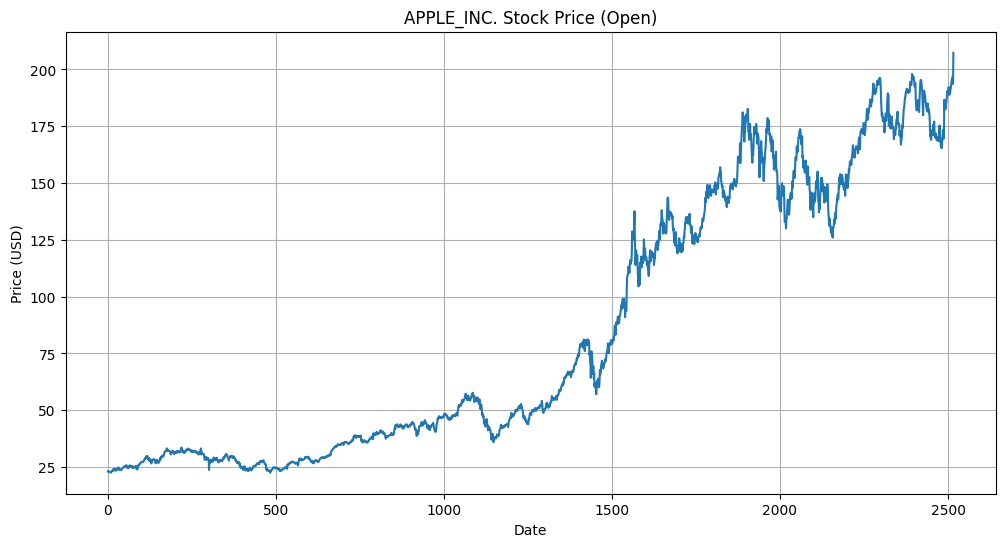

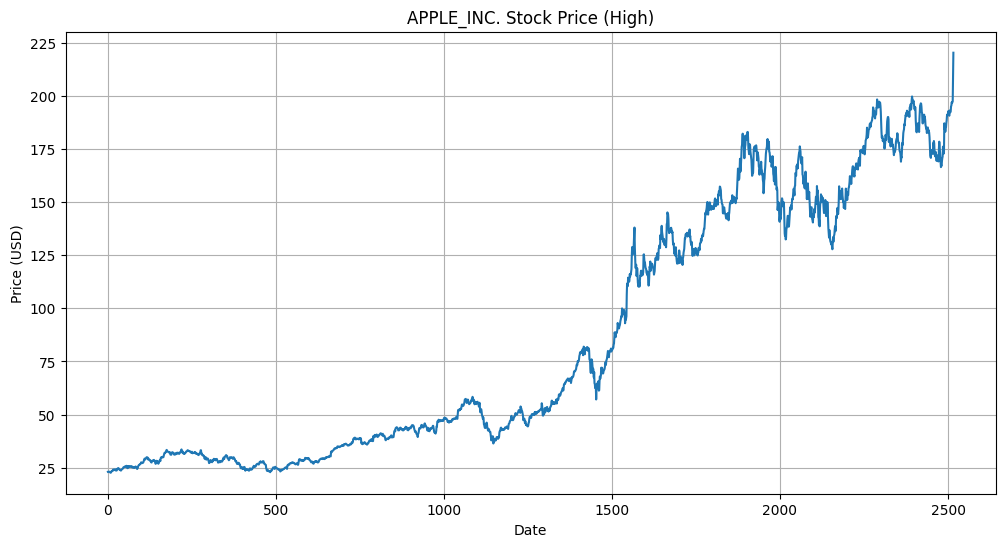

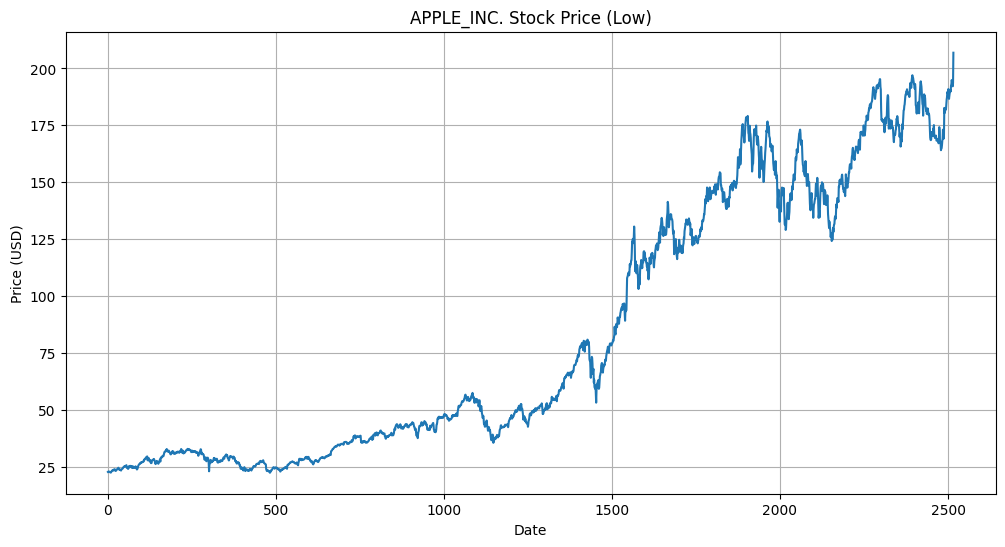

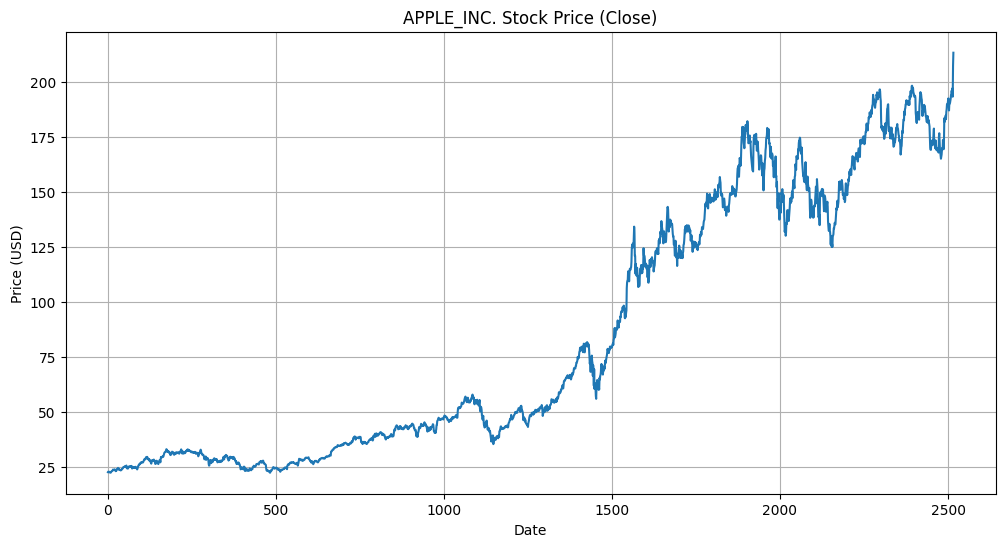

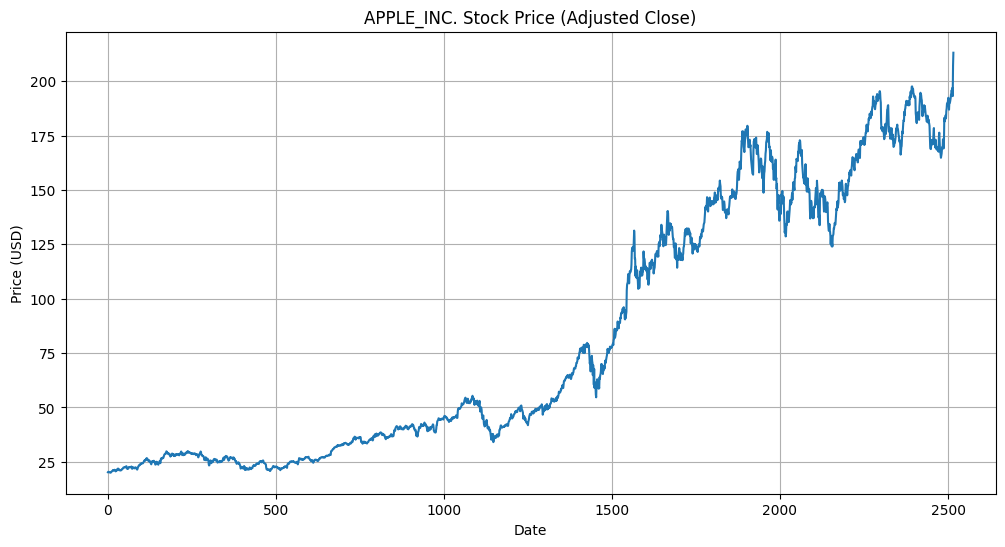

In [33]:
# 1) Ensure output directory exists (relative path)
plots_dir = "/kaggle/working/plots"
os.makedirs(plots_dir, exist_ok=True)

dataset_name = "APPLE_INC."
symbol       = dataset_name.replace(" ", "_")

# 2) Columns and titles
plot_specs = [
    ("Open",      "Stock Price (Open)"),
    ("High",      "Stock Price (High)"),
    ("Low",       "Stock Price (Low)"),
    ("Close",     "Stock Price (Close)"),
    ("Adj Close", "Stock Price (Adjusted Close)"),
]

# 3) Loop through specs to save + show
for col, title_suffix in plot_specs:
    plt.figure(figsize=(12, 6))
    plt.plot(df_appl_train[col], label=col)
    plt.title(f"{dataset_name} {title_suffix}")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.grid(True)

    # Build a safe filename, e.g. 'open_BAJAJ_AUTO.png'
    filename = f"{col.replace(' ', '').lower()}_{symbol}.png"
    filepath = os.path.join(plots_dir, filename)

    # Save to disk
    plt.savefig(filepath)

    # Display in notebook
    plt.show()

In [35]:
df_appl_train = df_appl_train.drop(['Date'], axis = 1, errors = "ignore")
df_appl_train.head()

,Open,High,Low,Close,Adj Close,Volume
0,23.049999,23.110001,22.719999,22.820000,20.185097,218100000
1,22.877501,23.187500,22.862499,23.049999,20.388538,142244000
2,23.077499,23.174999,22.950001,23.020000,20.362005,118904000
3,23.067499,23.072500,22.837500,23.045000,20.384115,134056000
4,23.072500,23.075001,22.834999,22.965000,20.313353,142112000


In [38]:
df_appl_train['Volume_log'] = np.log1p(df_appl_train['Volume'])
feature_cols_appl = ['High', 'Low', 'Close', 'Adj Close', 'Volume_log']
target_col_appl = 'Open'
df_appl_train.head()

,Open,High,Low,Close,Adj Close,Volume,Volume_log
0,23.049999,23.110001,22.719999,22.820000,20.185097,218100000,19.200464
1,22.877501,23.187500,22.862499,23.049999,20.388538,142244000,18.773054
2,23.077499,23.174999,22.950001,23.020000,20.362005,118904000,18.593827
3,23.067499,23.072500,22.837500,23.045000,20.384115,134056000,18.713768
4,23.072500,23.075001,22.834999,22.965000,20.313353,142112000,18.772126


In [39]:
split_idx_appl = int(len(df_appl_train) * 0.9)

X_train_appl = df_appl_train.iloc[:split_idx_appl][feature_cols_appl]
y_train_appl = df_appl_train.iloc[:split_idx_appl][target_col_appl]

X_val_appl   = df_appl_train.iloc[split_idx_appl:][feature_cols_appl]
y_val_appl = df_appl_train.iloc[split_idx_appl:][target_col_appl]

print(f"Train shape: {X_train_appl.shape} → {y_train_appl.shape}")
print(f"Validation shape: {X_val_appl.shape} → {y_val_appl.shape}")

Train shape: (2265, 5) → (2265,)
Validation shape: (252, 5) → (252,)


In [40]:
print("Training part:")
print("Feature cols :-\n")
print(X_train_appl.head())
print()
print("Target col :-\n")
print(y_train_appl.head())

print()

print("Validation Part:")
print("Feature cols :-\n")
print(X_val_appl.head())
print()
print("Target col :-\n")
print(y_val_appl.head())


Training part:
Feature cols :-

        High        Low      Close  Adj Close  Volume_log
0  23.110001  22.719999  22.820000  20.185097   19.200464
1  23.187500  22.862499  23.049999  20.388538   18.773054
2  23.174999  22.950001  23.020000  20.362005   18.593827
3  23.072500  22.837500  23.045000  20.384115   18.713768
4  23.075001  22.834999  22.965000  20.313353   18.772126

Target col :-

0    23.049999
1    22.877501
2    23.077499
3    23.067499
4    23.072500
Name: Open, dtype: float64

Validation Part:
Feature cols :-

            High         Low       Close   Adj Close  Volume_log
2265  184.149994  182.440002  183.309998  182.341629   17.821554
2266  184.389999  182.020004  183.949997  182.978256   17.866650
2267  186.520004  183.779999  186.009995  185.027359   17.996540
2268  186.990005  184.270004  184.919998  183.943130   18.432961
2269  186.100006  184.410004  185.009995  184.032639   17.723507

Target col :-

2265    182.800003
2266    183.369995
2267    183.960007
2268

In [41]:
#SCALING
sc_X_rob_train_appl = RobustScaler()
sc_y_rob_train_appl = RobustScaler()

# Fit on training data only
X_train_appl_scaled = sc_X_rob_train_appl.fit_transform(X_train_appl)
y_train_appl_scaled = sc_y_rob_train_appl.fit_transform(y_train_appl.values.reshape(-1, 1))

# Apply same transforms on validation
X_val_appl_scaled = sc_X_rob_train_appl.transform(X_val_appl)
y_val_appl_scaled = sc_y_rob_train_appl.transform(y_val_appl.values.reshape(-1, 1))

In [42]:
# Flatten the (n,1) arrays to (n,)
y_train_appl_flat = y_train_appl_scaled.ravel()
y_val_appl_flat   = y_val_appl_scaled.ravel()

# Re-create DataFrame/Series with matching indices
X_train_appl_scaled_df = pd.DataFrame(X_train_appl_scaled, columns = feature_cols_appl, index = X_train_appl.index)
y_train_appl_scaled_s  = pd.Series(y_train_appl_flat, name = target_col_appl, index = X_train_appl.index)

X_val_appl_scaled_df   = pd.DataFrame(X_val_appl_scaled, columns = feature_cols_appl, index = X_val_appl.index)
y_val_appl_scaled_s    = pd.Series(y_val_appl_flat, name = target_col_appl, index = X_val_appl.index)

# Now .head() works
print("Training part:")
print("Feature cols :-\n")
print(X_train_appl_scaled_df.head())

print("\nTarget col :-\n")
print(y_train_appl_scaled_s.head())

print("\nValidation Part:")
print("Feature cols :-\n")
print(X_val_appl_scaled_df.head())

print("\nTarget col :-\n")
print(y_val_appl_scaled_s.head())

Training part:
Feature cols :-

       High       Low     Close  Adj Close  Volume_log
0 -0.254207 -0.258923 -0.258226  -0.260912    1.006434
1 -0.253417 -0.257429 -0.255844  -0.258818    0.352144
2 -0.253544 -0.256512 -0.256155  -0.259091    0.077779
3 -0.254589 -0.257691 -0.255896  -0.258864    0.261387
4 -0.254564 -0.257717 -0.256724  -0.259592    0.350723

Target col :-

0   -0.256047
1   -0.257833
2   -0.255763
3   -0.255866
4   -0.255815
Name: Open, dtype: float64

Validation Part:
Feature cols :-

          High       Low     Close  Adj Close  Volume_log
2265  1.388220  1.415204  1.403635   1.407912   -1.104436
2266  1.390668  1.410801  1.410262   1.414464   -1.035402
2267  1.412392  1.429249  1.431593   1.435552   -0.836563
2268  1.417185  1.434385  1.420306   1.424394   -0.168479
2269  1.408108  1.435852  1.421238   1.425315   -1.254528

Target col :-

2265    1.397123
2266    1.403022
2267    1.409127
2268    1.437793
2269    1.413784
Name: Open, dtype: float64


In [43]:
# Check loaded datasets shape
print(f"Training part Shape [feature columns]: {X_train_appl_scaled_df.shape}")
print(f"Training part Shape [target column]: {y_train_appl_scaled_s.shape}")

print(f"Validation part Shape [feature columns]: {X_val_appl_scaled_df.shape}")
print(f"Validation part Shape [target column]: {y_val_appl_scaled_s.shape}")

Training part Shape [feature columns]: (2265, 5)
Training part Shape [target column]: (2265,)
Validation part Shape [feature columns]: (252, 5)
Validation part Shape [target column]: (252,)


In [44]:
#extract features
X_train_appl_SCALED = X_train_appl_scaled_df[feature_cols_appl].values
X_val_appl_SCALED = X_val_appl_scaled_df[feature_cols_appl].values

In [45]:
# If you built y_train_scaled_s as a pandas Series:
y_train_appl_flat = y_train_appl_scaled_s.values  # shape = (n_samples,)
y_val_appl_flat   = y_val_appl_scaled_s.values    # shape = (n_samples,)

In [46]:
#SHAPES
print("Dataset shapes:")
print(f"  X_train_appl_SCALED: {X_train_appl_SCALED.shape}")
print(f"  y_train_appl_flat:   {y_train_appl_flat.shape}")
print(f"  X_val_appl_SCALED:   {X_val_appl_SCALED.shape}")
print(f"  y_val_appl_flat:     {y_val_appl_flat.shape}")

Dataset shapes:
  X_train_appl_SCALED: (2265, 5)
  y_train_appl_flat:   (2265,)
  X_val_appl_SCALED:   (252, 5)
  y_val_appl_flat:     (252,)


In [48]:
import numpy as np

def make_lstm_sequences_appl(X, y, window_size):
    """
    X: numpy array of shape (n_samples, n_features)
    y: numpy array of shape (n_samples,)  or (n_samples,1)
    window_size: how many past timesteps to use
    
    Returns:
      X_seq: (n_samples-window_size, window_size, n_features)
      y_seq: (n_samples-window_size,)
    """
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i : i + window_size])
        y_seq.append(y[i + window_size])
    return np.array(X_seq), np.array(y_seq).reshape(-1,)

# assume you have:
#   X_train_SCALED  (n_train, n_features)
#   X_val_SCALED    (n_val,   n_features)
#   y_train_flat    (n_train,)  # e.g. y_train_scaled_s.values
#   y_val_flat      (n_val,)

WINDOW_SIZE = 60

X_train_appl_seq, y_train_appl_seq = make_lstm_sequences_appl(X_train_appl_SCALED, y_train_appl_flat, WINDOW_SIZE)
X_val_appl_seq, y_val_appl_seq   = make_lstm_sequences_appl(X_val_appl_SCALED, y_val_appl_flat,   WINDOW_SIZE)

print("After sequencing:")
print(f"  X_train_appl_seq shape = {X_train_appl_seq.shape}  # → (n_train−{WINDOW_SIZE}, {WINDOW_SIZE}, n_features)")
print(f"  y_train_apple_seq shape = {y_train_appl_seq.shape}")
print(f"  X_val_apple_seq   shape = {X_val_appl_seq.shape}")
print(f"  y_val_apple_seq   shape = {y_val_appl_seq.shape}")


After sequencing:
  X_train_appl_seq shape = (2205, 60, 5)  # → (n_train−60, 60, n_features)
  y_train_apple_seq shape = (2205,)
  X_val_apple_seq   shape = (192, 60, 5)
  y_val_apple_seq   shape = (192,)


# Building Model for Apple dataset

In [122]:
#INITIALIZE MODEL
regressor_APPLE = Sequential()

#ADD INPUT LAYER
regressor_APPLE.add(Input(shape=(X_train_appl_seq.shape[1], X_train_appl_seq.shape[2])))

# Add first LSTM layer and dropout regularization layer
regressor_APPLE.add(LSTM(units = 100, return_sequences = True))
regressor_APPLE.add(Dropout(rate = 0.2))

# Add second LSTM layer and dropout regularization layer
regressor_APPLE.add(LSTM(units = 100, return_sequences = True))
regressor_APPLE.add(Dropout(rate = 0.2))

# Add third LSTM layer and dropout regularization layer
regressor_APPLE.add(LSTM(units = 100, return_sequences = True))
regressor_APPLE.add(Dropout(rate = 0.2))

# Add forth LSTM layer and dropout regularization layer
regressor_APPLE.add(LSTM(units = 100))
regressor_APPLE.add(Dropout(rate = 0.2))

# Add last dense layer/output layer
regressor_APPLE.add(Dense(units = 1))

# Compiling the model
regressor_APPLE.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0),
    loss='mean_squared_error',  # More robust to outliers than MSE
    metrics=['mae', 'mse']
)

In [134]:
# ROBUST LSTM MODEL WITH OVERFITTING PREVENTION
def create_robust_lstm_model_appl(input_shape, 
                           lstm_units=[64, 32, 16], 
                           dropout_rates=[0.20, 0.25, 0.30],
                           l1_reg=0.001, 
                           l2_reg=0.001):
    """
    Creates a robust LSTM model with multiple overfitting prevention techniques
    
    Args:
        input_shape: Shape of input data (timesteps, features)
        lstm_units: List of units for each LSTM layer
        dropout_rates: List of dropout rates for each layer
        l1_reg: L1 regularization strength
        l2_reg: L2 regularization strength
    """
    
    model = Sequential()
    
    # INPUT LAYER
    model.add(Input(shape=input_shape))
    
    # FIRST LSTM LAYER with regularization
    model.add(LSTM(units=lstm_units[0], 
                   return_sequences=True,
                   kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg),
                   recurrent_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rates[0]))
    
    # SECOND LSTM LAYER with regularization
    model.add(LSTM(units=lstm_units[1], 
                   return_sequences=True,
                   kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg),
                   recurrent_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rates[1]))
    
    # THIRD LSTM LAYER (final LSTM layer)
    model.add(LSTM(units=lstm_units[2],
                   kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg),
                   recurrent_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rates[2]))
    
    # OUTPUT LAYER
    model.add(Dense(units=1, kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
    
    return model

# CREATE THE ROBUST MODEL
regressor_APPLE = create_robust_lstm_model_appl(
    input_shape=(X_train_appl_seq.shape[1], X_train_appl_seq.shape[2]),
    lstm_units=[100, 100, 100],  # Decreasing units for feature extraction
    dropout_rates=[0.20, 0.25, 0.30]  # Increasing dropout rates
)

# COMPILE WITH APPROPRIATE OPTIMIZER AND LEARNING RATE
regressor_APPLE.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0),
    loss='huber',  # More robust to outliers than MSE
    metrics=['mae', 'mse']
)

In [135]:
# Create a checkpoint to monitor the validation loss and save the model with the best performance.
model_location = "/kaggle/working/models/"
model_name = "model_lstm_APPLE_10.model.keras"

best_model_checkpoint_callback = ModelCheckpoint(
    model_location + model_name, 
    monitor="val_loss", 
    save_best_only=True, 
    mode="min", 
    verbose=0
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,   # roll back to the best model when stopping
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.57,      # cut LR 
    patience=3,      # wait 3 epochs with no improvement
    min_lr=1e-14,     # don't go below this LR
    verbose=1
)

In [136]:
# Training the model
history_APPLE = regressor_APPLE.fit(
    x = X_train_appl_seq, 
    y = y_train_appl_seq,
    validation_data = (X_val_appl_seq, y_val_appl_seq),
    epochs=200,
    batch_size=64,
    callbacks=[best_model_checkpoint_callback, reduce_lr, early_stop]
)


Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 10.1192 - mae: 1.1686 - mse: 2.4792 - val_loss: 7.7587 - val_mae: 0.9702 - val_mse: 0.9492 - learning_rate: 0.0010
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.0498 - mae: 0.7406 - mse: 0.8956 - val_loss: 5.2081 - val_mae: 0.6550 - val_mse: 0.4369 - learning_rate: 0.0010
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.8806 - mae: 0.6890 - mse: 0.7465 - val_loss: 4.0091 - val_mae: 1.1282 - val_mse: 1.2811 - learning_rate: 0.0010
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.3504 - mae: 0.5938 - mse: 0.5673 - val_loss: 2.7276 - val_mae: 0.8854 - val_mse: 0.7923 - learning_rate: 0.0010
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.3359 - mae: 0.5001 - mse: 0.4065 - val_loss: 2.1045 - val_mae: 0.9473 - val_mse: 0.9048 - learning_rate: 0.0010
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.6778 - mae: 0.4334 - mse: 0.3075 - val_loss: 1.7264 - val_mae: 1.01

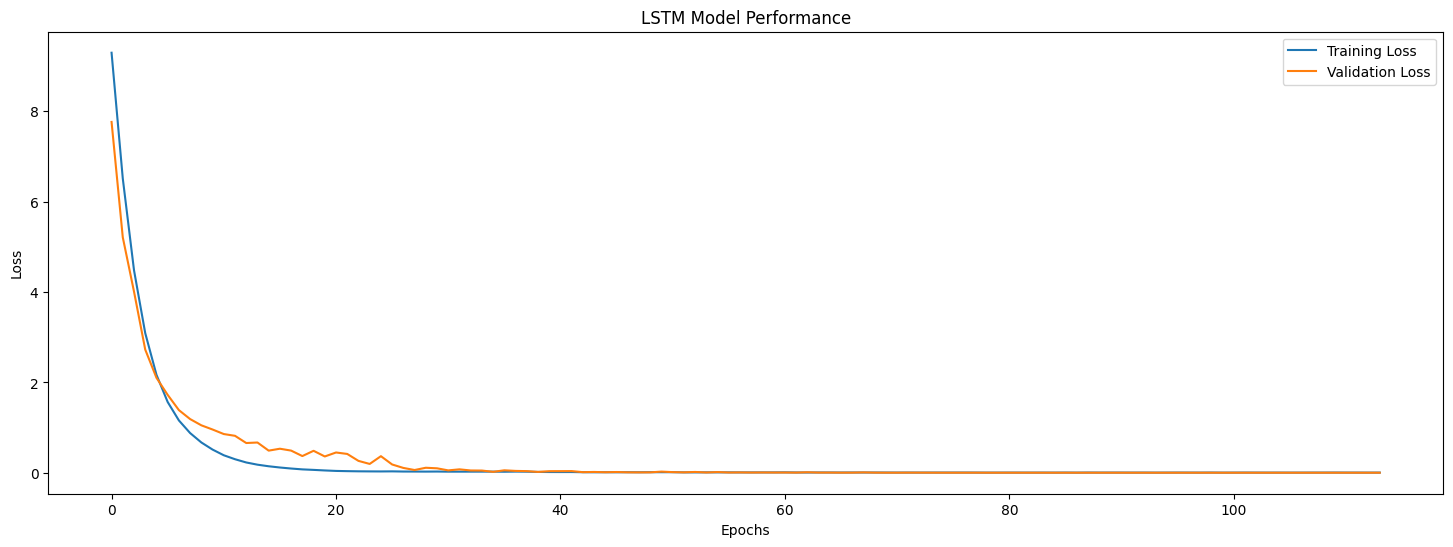

In [137]:
# Visualizing model performance during training
plt.figure(figsize=(18, 6))

plt.plot(history_APPLE.history["loss"], label="Training Loss")
plt.plot(history_APPLE.history["val_loss"], label="Validation Loss")

plt.title("LSTM Model Performance")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [138]:
model_loc = "/kaggle/working/models/"
model_name = "model_lstm_APPLE_10.model.keras"
best_model = load_model(model_loc + model_name)

In [139]:
# 1) Get scaled predictions
y_train_appl_pred_scaled = best_model.predict(X_train_appl_seq)
y_val_appl_pred_scaled   = best_model.predict(X_val_appl_seq)

# 2) Inverse‐scale back to original prices
y_train_appl_pred = sc_y_rob_train_appl.inverse_transform(y_train_appl_pred_scaled.reshape(-1,1)).ravel()
y_train_appl_true = sc_y_rob_train_appl.inverse_transform(y_train_appl_seq.reshape(-1,1)).ravel()

y_val_appl_pred = sc_y_rob_train_appl.inverse_transform(y_val_appl_pred_scaled.reshape(-1,1)).ravel()
y_val_appl_true = sc_y_rob_train_appl.inverse_transform(y_val_appl_seq.reshape(-1,1)).ravel()

69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [140]:
print("Training Part :-\n")
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_appl_true, y_train_appl_pred)))
print("Train MAE: ", mean_absolute_error( y_train_appl_true, y_train_appl_pred))
print("Train R²:  ", r2_score(y_train_appl_true, y_train_appl_pred))

print()

print("Validation Part :-\n")
print("Val RMSE:", np.sqrt(mean_squared_error(y_val_appl_true,   y_val_appl_pred)))
print("Val MAE: ", mean_absolute_error(y_val_appl_true, y_val_appl_pred))
print("Val R²:  ", r2_score(y_val_appl_true,   y_val_appl_pred))

Training Part :-

Train RMSE: 3.9498250966870505
Train MAE:  2.7100287795740106
Train R²:   0.9940622931359442

Validation Part :-

Val RMSE: 6.024571898223313
Val MAE:  4.982270814748126
Val R²:   0.5749634606506338


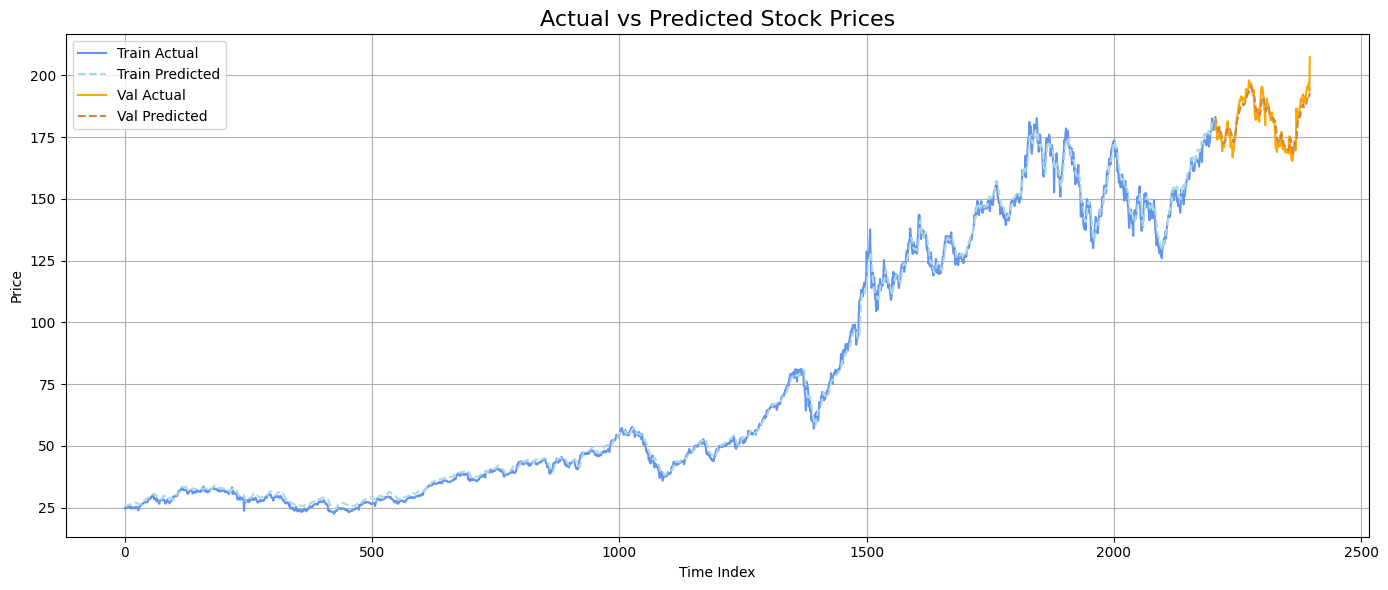

In [129]:
# Define chart colors
train_actual_color = "cornflowerblue"
validate_actual_color = "orange"
train_predicted_color = "lightblue"
validate_predicted_color = "peru"

plt.figure(figsize=(14, 6))

# Plot Training Set
plt.plot(y_train_appl_true, color=train_actual_color, label="Train Actual")
plt.plot(y_train_appl_pred, color=train_predicted_color, linestyle='--', label="Train Predicted")

# Plot Validation Set
# Offset validation indices to follow training indices for clarity
val_start_index = len(y_train_appl_true)
val_indices = list(range(val_start_index, val_start_index + len(y_val_appl_true)))

plt.plot(val_indices, y_val_appl_true, color=validate_actual_color, label="Val Actual")
plt.plot(val_indices, y_val_appl_pred, color=validate_predicted_color, linestyle='--', label="Val Predicted")

# Formatting
plt.title("Actual vs Predicted Stock Prices", fontsize=16)
plt.xlabel("Time Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


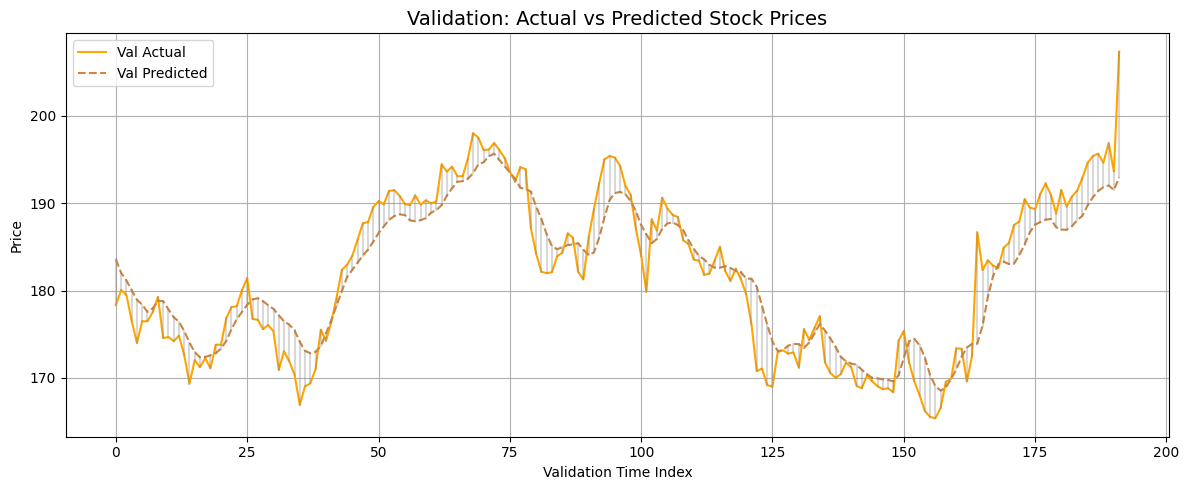

In [130]:
plt.figure(figsize=(12, 5))

# Plot only the validation data
plt.plot(y_val_appl_true, color="orange", label="Val Actual")
plt.plot(y_val_appl_pred, color="peru", linestyle='--', label="Val Predicted")

# Highlight errors with vertical gray lines
for i in range(len(y_val_appl_true)):
    plt.plot([i, i], [y_val_appl_true[i], y_val_appl_pred[i]], color='gray', alpha=0.3)

# Labels and formatting
plt.title("Validation: Actual vs Predicted Stock Prices", fontsize=14)
plt.xlabel("Validation Time Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [131]:
os.rename("/kaggle/working/models/model_lstm_APPLE_9.model.keras", "/kaggle/working/models/model_lstm_APPLE_9_BEST2.model.keras")

# Ensemble

In [145]:
df_test_ensemble = pd.read_csv("/kaggle/input/other-datasets/MYDATA/test/SBIN.NS.csv")

df_test_ensemble = df_test_ensemble.drop(['Date'], axis=1, errors='ignore')

# Drop NA if present
df_test_ensemble.dropna(inplace=True)
df_test_ensemble.head()

,Open,High,Low,Close,Adj Close,Volume
0,270.799988,271.000000,258.600006,260.790009,237.119949,18537170.0
1,261.089996,261.494995,254.705002,258.065002,234.642258,17379420.0
2,256.410004,267.234985,255.350006,265.329987,241.247833,22808210.0
3,264.000000,268.429993,260.665009,264.154999,240.179504,25021300.0
4,264.700012,266.834991,259.540009,260.545013,236.897186,21446630.0


In [146]:
df_test_ensemble.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2.464000e+03
mean,357.632119,361.890402,352.772670,357.192534,339.370845,2.508000e+07
std,150.114157,151.330160,148.756832,150.157311,150.632879,2.135156e+07
min,151.949997,153.199997,148.250000,150.850006,139.764587,0.000000e+00
25%,256.293762,258.943741,253.162498,255.740002,237.597988,1.292767e+07
50%,294.550003,298.274994,290.199997,294.024994,274.749237,1.779577e+07
75%,466.662506,472.087502,460.125008,466.137497,446.017975,2.834499e+07
max,897.000000,912.000000,856.750000,905.650024,905.650024,2.626771e+08


In [147]:
df_test_ensemble['Volume_log'] = np.log1p(df_test_ensemble['Volume'])

In [148]:
feature_cols_ensemble = ['High', 'Low', 'Close', 'Adj Close', 'Volume_log']
target_col_ensemble  = 'Open'

X_test_ensemble = df_test_ensemble[feature_cols_ensemble]
y_test_ensemble = df_test_ensemble[target_col_ensemble]

print(f"Test shape: {X_test_ensemble.shape} → {y_test_ensemble.shape}")

print(len(X_test_ensemble), len(y_test_ensemble))

Test shape: (2464, 5) → (2464,)
2464 2464


In [153]:
from sklearn.preprocessing import RobustScaler as RS

# TEMP SCALERS FOR DEBUGGING
sc_X_test_rob_ensemble = RS()
sc_y_test_rob_ensemble = RS()

X_test_scaled_ensemble = sc_X_test_rob_ensemble.fit_transform(X_test_ensemble)
y_test_scaled_ensemble = sc_y_test_rob_ensemble.fit_transform(y_test_ensemble.values.reshape(-1,1))

print(len(X_test_scaled_ensemble), len(y_test_scaled_ensemble))

2464 2464


In [155]:
def create_lookback_sequences_ensemble(X, y, lookback=60):
    X_seq, y_seq = [], []
    for i in range(lookback, len(X)):
        X_seq.append(X[i-lookback:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)


lookback = 60
X_test_seq_ensemble, y_test_ensemble_seq = create_lookback_sequences_ensemble(X_test_scaled_ensemble, y_test_scaled_ensemble)
print(len(X_test_seq_ensemble), len(y_test_ensemble_seq))

2404 2404


In [156]:
from tensorflow.keras.models import load_model
import numpy as np

# Load both models
model1 = load_model('/kaggle/input/model_no_batchnorm_lstm.model_mbg/keras/default/1/model_NO_batchNorm_lstm.model_MBG.keras')
model2 = load_model('/kaggle/input/btc_model/keras/default/1/model_lstm_BTC.model.keras')
model3 = load_model('/kaggle/input/model_bajaj/keras/default/1/model_lstm_BAJAJ_14_BEST1.model.keras')
model4 = load_model('/kaggle/working/models/model_lstm_APPLE_5_BEST1.model.keras')

# Get predictions
preds1 = model1.predict(X_test_seq)
preds2 = model2.predict(X_test_seq)
preds3 = model3.predict(X_test_seq)
preds4 = model4.predict(X_test_seq)

# Average predictions
final_preds = (preds1 + preds2 + preds3 + preds4) / 4

# Inverse scale if needed
final_preds = sc_y_test_rob_ensemble.inverse_transform(final_preds).ravel()
y_true = sc_y_test_rob_ensemble.inverse_transform(y_test_seq).ravel()

# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("RMSE:", np.sqrt(mean_squared_error(y_true, final_preds)))
print("MAE: ", mean_absolute_error(y_true, final_preds))
print("R²:  ", r2_score(y_true, final_preds))


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
RMSE: 11.891549849237842
MAE:  9.429340357314793
R²:   0.9936761976048973


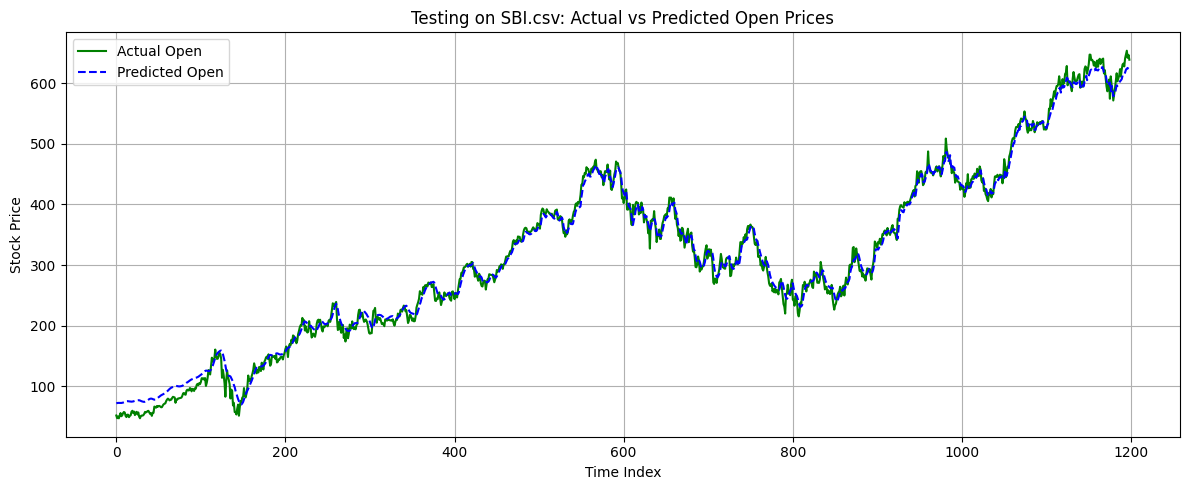

In [157]:
plt.figure(figsize=(12, 5))
plt.plot(y_true, color='green', label='Actual Open')
plt.plot(final_preds, color='blue', linestyle='--', label='Predicted Open')
plt.title("Testing on SBI.csv: Actual vs Predicted Open Prices")
plt.xlabel("Time Index")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [158]:
print("y_test shape:", y_true.shape)
print("Ensemble predictions shape:", final_preds.shape)

final_preds = final_preds.flatten()

results_df = pd.DataFrame({
    'Actual': y_true.flatten(),
    'Predicted': final_preds
})

print(results_df.head(20))

y_test shape: (1199,)
Ensemble predictions shape: (1199,)
       Actual  Predicted
0   52.071804  72.229431
1   47.598042  72.627411
2   50.444973  72.835907
3   47.374354  72.783478
4   52.193812  72.659119
5   56.057508  72.624680
6   50.892354  72.746933
7   52.295494  72.974014
8   55.976181  73.322525
9   57.847025  73.862549
10  56.952266  74.612457
11  51.278729  75.308273
12  49.468889  75.695374
13  53.413942  75.758789
14  53.271581  75.625687
15  49.306202  75.429321
16  51.604102  75.218445
17  52.417502  75.021072
18  58.396087  74.866074
19  59.839878  74.983810


In [159]:
results_df['Error'] = abs(results_df['Actual'] - results_df['Predicted'])
results_df_sorted = results_df.sort_values(by='Error', ascending=True)

# Save entire sorted DataFrame to CSV
results_df_sorted.to_csv('/kaggle/working/results_sorted_by_error_modelEnsemble_testSBI_4models.csv', index=False)